In [82]:
import numpy as np
import networkx as nx
import scipy.sparse.linalg as spl
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
l_5_10 = nx.lollipop_graph(5, 10)

In [45]:
lap = nx.laplacian_matrix(l_5_10)

In [46]:
nx.laplacian_spectrum(l_5_10)

array([  4.37150316e-16,   4.91231715e-02,   2.27482682e-01,
         5.51129984e-01,   1.00000000e+00,   1.53808012e+00,
         2.12054390e+00,   2.69776371e+00,   3.21895574e+00,
         3.63574469e+00,   3.90612554e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   6.05505046e+00])

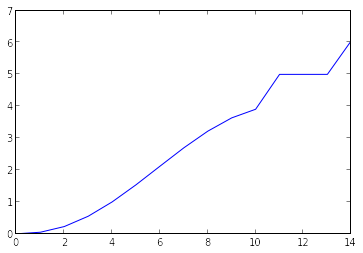

In [47]:
plt.plot(nx.laplacian_spectrum(l_5_10))

In [48]:
def plot_spectrum(graph):
    plt.plot(nx.laplacian_spectrum(graph))
    plt.show()

In [49]:
def plot_lap_spectrum(laplacian):
    eigs = np.linalg.eigvals(laplacian)
    eigs.sort()
    plt.plot(eigs)
    plt.show()

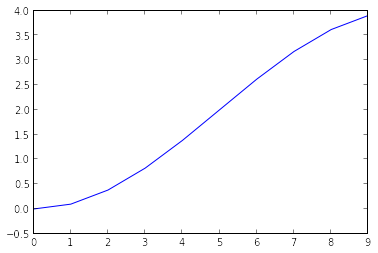

In [50]:
plot_lap_spectrum((nx.laplacian_matrix(nx.path_graph(10)).todense()+0*np.eye(10)))

In [51]:
bb_10_10 = nx.barbell_graph(10,10)

In [52]:
eigs = nx.laplacian_spectrum(bb_10_10)

In [53]:
eigs.shape

(30,)

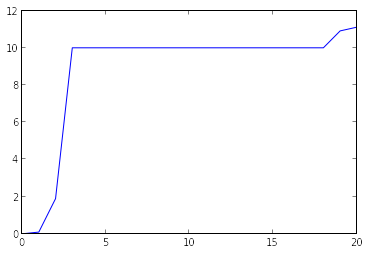

In [54]:
plot_spectrum(nx.barbell_graph(10, 1))

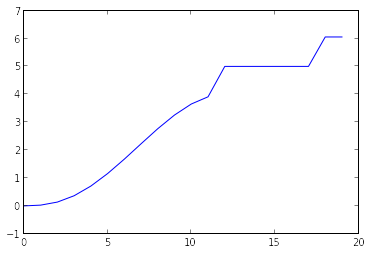

In [55]:
plot_spectrum(nx.barbell_graph(5, 10))

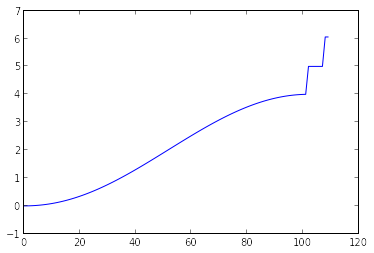

In [56]:
plot_spectrum(nx.barbell_graph(5, 100))

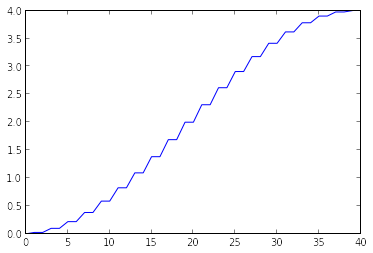

In [57]:
plot_spectrum(nx.cycle_graph(40))

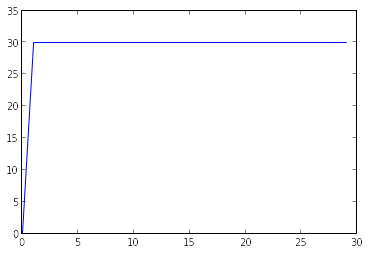

In [58]:
plot_spectrum(nx.complete_graph(30))

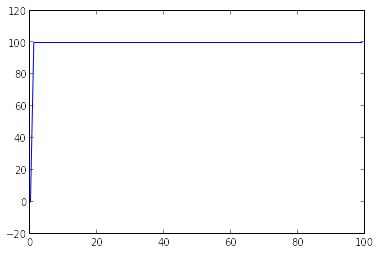

In [59]:
plot_spectrum(nx.complete_graph(100))

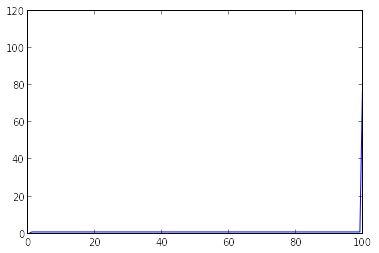

In [60]:
plot_spectrum(nx.star_graph(100))

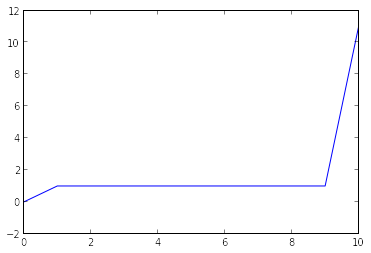

In [61]:
plot_spectrum(nx.star_graph(10))

In [62]:
nx.laplacian_spectrum(nx.star_graph(10))

array([ -7.21644966e-16,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.10000000e+01])

In [63]:
s40 = nx.star_graph(40)

In [64]:
def add_random_edges(graph, prob):
    total = graph.size()
    print("Total verts: ", total)
    for v1 in range(total):
        for v2 in range(v1):
            if not graph.has_edge(v1, v2) and np.random.uniform() <= prob:
                graph.add_edge(v1, v2)
    return graph

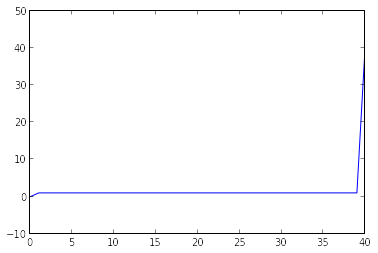

In [65]:
plot_spectrum(s40)

In [66]:
s41 = s40.copy()

In [67]:
s41.size()

40

In [68]:
add_random_edges(s41, 0.01)

('Total verts: ', 40)


In [69]:
s41.size()

45

In [70]:
len(s40.edges())

40

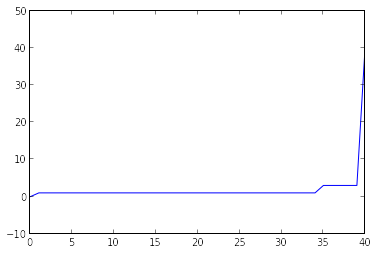

In [71]:
plot_spectrum(s41)

In [72]:
s41_lap = nx.laplacian_matrix(s41)

In [73]:
s41_lap = s41_lap.todense()

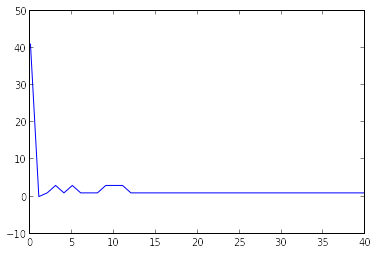

In [74]:
plt.plot(np.linalg.eigvals(s41_lap))

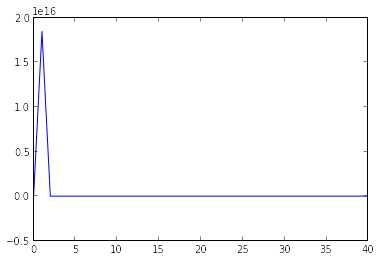

In [75]:
plt.plot(np.linalg.eigvals(np.linalg.inv(s41_lap)))

In [76]:
def get_lap(graph):
    return nx.laplacian_matrix(graph).todense()

In [77]:
get_lap(nx.complete_graph(5))

matrix([[ 4, -1, -1, -1, -1],
        [-1,  4, -1, -1, -1],
        [-1, -1,  4, -1, -1],
        [-1, -1, -1,  4, -1],
        [-1, -1, -1, -1,  4]])

In [98]:
def kernel(l1, l2, gamma=0.1, eta=0.1):
    ident = np.eye(l1.shape[0])
    l_1 = l1 + eta*ident
    l_2 = l2 + eta*ident
    
    s_1 = np.linalg.inv(l_1) + gamma*ident
    s_2 = np.linalg.inv(l_2) + gamma*ident
    
    s_1_inv = np.linalg.inv(s_1)
    s_2_inv = np.linalg.inv(s_2)

    numerator = math.sqrt(np.linalg.det(np.linalg.inv(0.5*s_1_inv + 0.5*s_2_inv)))
    denominator = math.pow(np.linalg.det(s_1), 0.25) * math.pow(np.linalg.det(s_2), 0.25)
    return numerator / denominator

In [99]:
kernel(s41_lap, s41_lap)

0.9999999999999986

In [100]:
s40_lap = nx.laplacian_matrix(s40).todense()

In [101]:
kernel(s40_lap, s40_lap)

1.000000000000001

In [103]:
s40_adj = add_random_edges(s40.copy(), 0.05)

('Total verts: ', 40)


In [106]:
len(s40_adj.edges())

77

In [107]:
len(s40.edges())

40

In [108]:
s40_adj_lap = nx.laplacian_matrix(s40_adj)

In [130]:
kernel(s40_lap, s40_adj_lap, eta=1, gamma=1)

0.9332252733822423

In [132]:
kernel(s40_lap, s40_lap, eta=12, gamma=1)

1.000000000000005

In [177]:
def plot_eta_effect(g1, g2):
    results = []
    etas = [0.05*i for i in range(1,151)]
    for e in etas:
        results.append((kernel(g1, g2,eta=e, gamma=0.1)))
    plt.plot(etas, results)
    plt.show()

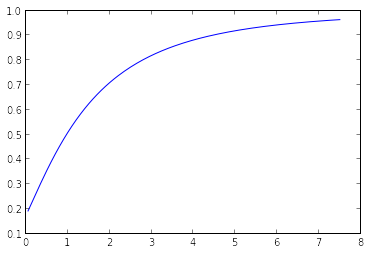

In [178]:
plot_eta_effect(s40_lap, s40_adj_lap)

In [251]:
def plot_gamma_effect(g1, g2, l=''):
    results = []
    gammas = [0.05*i for i in range(1,101)]
    for g in gammas:
        results.append(kernel(g1, g2,eta=0.1, gamma=g))
    #plt.plot(gammas, results, c=l) #, label=l)
    plt.plot(results, c=l) #, label=l)

In [252]:
plot_gamma_effect(s40_lap, s40_adj_lap, '')

ValueError: to_rgba: Invalid rgba arg ""
to_rgb: Invalid rgb arg ""
could not convert string to float: 

In [249]:
def plot_bunch(g, probs):
    colors = ['g','b' 'r', 'c', 'm', 'y', 'k']
    graphs = [add_random_edges(g.copy(), p) for p in probs]
    glap = nx.laplacian_matrix(g).todense()
    laps = [nx.laplacian_matrix(g).todense() for g in graphs]
    for p in range(len(probs)):
        lab = str(probs[p])
        plot_gamma_effect(glap, laps[p], l=colors[p])
        plt.hold()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
    plt.show()

('Total verts: ', 40)
('Total verts: ', 40)
('Total verts: ', 40)
('Total verts: ', 40)
('Total verts: ', 40)


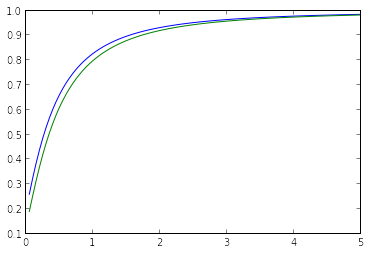

In [250]:
plot_bunch(s40, [0.01*i for i in range(5)])